# 分类模型（一）

## Linear_Models
1. Perceptron
2. Ordinary Least Squares
3. ridge
4. lasso
5. logistic regression 
6. linear svm


### Perceptron
* It does not require a learning rate. 
* It is not regularized (penalized). 
* It updates its model only on mistakes. 


In [4]:
class sklearn.linear_model.Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, 
                                      n_iter=5, shuffle=True, verbose=0, eta0=1.0, 
                                      n_jobs=1, random_state=0, class_weight=None, warm_start=False)

SyntaxError: invalid syntax (<ipython-input-4-1a353325160c>, line 1)

penalty: 默认没有惩罚项，但我们可以用别的包添加惩罚项
fit_intercept：截距
n_iter： 迭代多少次
verbose：sklearn，xgboost都有这个参数。是否将学习的过程打印出来。0就是不打印，1，2，3，数字越大，打印出的信息就月详细。
eta：类似于学习率。但是在perceptron里面没有这个东西
n_jobs：和CPU有关。就是你要设置多少个线程，是否并行地进行计算。设为6就是6个线程，如果你不知道有多少个，但是想让计算机用尽全力，那就设为-1.

我们一般修改的地方是n_iter，迭代次数，默认5次太少了。
修改其他参数并没有太大意义，结果也没什么太大变化。因为感知器是一个非常弱的模型

**返回**

因为是一个线性模型，所以会返回系数
- coef_
- intercept_

In [5]:
# Coding in here 
import pandas as pd
import numpy as np 
df = pd.read_csv("adultTest.csv")

In [6]:
# 这个数据集的结果就是看最后收入是否大于50k
print (df.shape)
df.head()


(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#有很多类别变量，首先要做的事情就是把这些类别变量转为OneHotEncode
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [8]:
dfNew = pd.get_dummies(data=df, columns=['workclass', 'education', 'marital-status', 'occupation', 
                                         'relationship', 'race', 'sex', 'native-country'])

In [9]:
print (dfNew.shape)
dfNew.head()

(32561, 109)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dfNew['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

In [11]:
# 因为有空格，所以下面用loc赋值的时候无法识别所有对应的字符。
# 我们要提前处理一下空格，用strip

dfNew['class'] = dfNew['class'].map(lambda s: s.strip(" "))

In [12]:
# 新建一个列，列的名字为target，把class里的值变为0，1存放在target列里
dfNew.loc[dfNew['class'] == '<=50K', 'target'] = 0
dfNew.loc[dfNew['class'] != '<=50K', 'target'] = 1

#xdata = dfNew.drop("class", axis = 1)

In [13]:
# 因为新建了target这一列，所以xdata要删除两列，class和target
xdata = dfNew.drop(['class', 'target'], axis = 1)
ydata = dfNew['target']

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
per = Perceptron(n_iter=20)

In [16]:
ydata.value_counts()
# 这里发现所有的class都是0，没有1. 回到上面发现是有些class里又空格，无法识别

0.0    24720
1.0     7841
Name: target, dtype: int64

在【21】行里处理空格后，这里得到的target和之前的数据才吻合。所以说，数据清洗要仔细

In [17]:
per.fit(xdata, ydata)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=20, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [18]:
per.predict(xdata)
# 我们预测返回的是类别。遗憾的是感知器没有概率值。
# 因为它不是一个sigmoid函数，只是个最简单的线性模型。
# sigmodi类似于logistic regression

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [19]:
per.decision_function(xdata)
# 感知器有decision_function，和SVM相似。得到的结果是一个分数，但并不是概率值
# 具体的decision_function在SVM那部分讲

array([  2.08930983e+10,   1.33288498e+10,   3.44527077e+10, ...,
         2.42918782e+10,   3.21760868e+10,   1.04614139e+11])

In [20]:
per.score(xdata, ydata)
# 评估我们的数据。一般是在test set上评估
# 现在我们是在训练集上训练，同样在训练集上评估
# 但结果也只有0.24，可见这个模型有多弱

0.24080955744602439

为了理解线性模型，先介绍一些回归模型

### Ordinary Least Squares（线性回归）
LinearRegression fits a linear model with coefficients w = (w_1, ..., w_p) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form
![ols](http://scikit-learn.org/stable/_images/math/e8e92a5482d9327d939e7a17946a8a1b98006018.png)
![ols1](http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_0011.png)

In [21]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

SyntaxError: invalid syntax (<ipython-input-21-5de1c599b87c>, line 1)

这也是个弱分类器

fit_intercept：是否要求出截距。

normalize：就是归一化。只不过我们不用提前把数据集normalize而已，方便你数据转化。如果你想做标准化，那就把这里设为False，然后把数据集标准化后再传入。

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(xdata, ydata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

我们的ydata是0，1的分类值。但是这里lr是把这个0，1当做了连续值来处理。不信的话看下面，预测出来的结果不是0，1.而是各种小数

In [25]:
lr.predict(xdata)

array([ 0.15969   ,  0.48415206, -0.01326322, ...,  0.0641282 ,
       -0.03778849,  0.71961644])

所以我们输入一个连续性的数据

In [26]:
ff = pd.read_csv("forestfires.csv")

In [27]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [28]:
ffNew = pd.get_dummies(data=ff, columns=['month', 'day'])

In [29]:
xdata_ff = ffNew.drop("area", axis=1)
ydata_ff = ffNew['area']

In [30]:
lr.fit(xdata_ff, ydata_ff)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr.predict(xdata_ff)

array([ -5.21605633e+00,   6.12548426e+00,   1.35014023e+01,
        -1.41256958e+01,  -8.67278693e+00,   2.70553049e+01,
         2.91902141e+01,  -5.67006638e+00,   2.70245118e+01,
         4.01278117e+01,   3.84821337e+01,   2.25670616e+01,
        -7.86565856e+00,   2.81700912e+01,   3.99535961e+01,
         2.57660042e+01,   2.09694374e+01,   1.34003370e+01,
         7.39105361e+00,   1.42050921e+01,   2.73173260e+01,
         8.93385709e+00,  -3.83820059e+00,   3.83733820e+01,
         3.57271214e+01,   1.24612090e+01,   2.74896076e+01,
         2.55253898e+01,   5.53232349e+01,   3.10687338e+01,
         1.87621521e+01,   1.13573904e+01,   8.30994699e+00,
         1.13011402e+01,   1.48679203e+01,   1.37171549e+01,
         1.71334684e+01,  -6.64964381e+00,   2.39359924e+01,
         6.50309023e-01,   1.78389095e+01,   1.66276780e+01,
        -7.00964730e+00,   2.57154898e+01,  -1.14570780e+00,
         2.29803113e+01,   1.62023937e+01,   3.93479356e+00,
        -4.91915259e+00,

In [32]:
lr.score(xdata_ff, ydata_ff)

0.045782096508085179

这个数字是R^2，是一个统计学的数字。这个数字表示x对y的变动做出了多少贡献。
我们发现这个变动解释只有4.6%，是很低的

In [33]:
help(lr.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the regression
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float

我们想知道通过修改参数能不能把这个score提高一些呢，试一试吧。

In [34]:
lr2 = LinearRegression(normalize=True)

In [35]:
lr2.fit(xdata_ff, ydata_ff)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [36]:
lr2.score(xdata_ff, ydata_ff)

0.045804398180301464

结果发现也没有提高多少。这也是最小二乘法的弱项之处，没有什么好的参数来让我们调参，来增加准确率。因为这个模型只要给了x和y，不需要任何其他东西，比如正则和转换，就能得到w。

> 下面我们介绍的两种模型就比刚才的线性模型好很多,会做一些变换。做得最大的变换就是加了一个正则项。Ridge是加了一个L2的正则，Lasso是加了一个L1的正则。可以理解为L1范数，L2范数。

**那么二者有什么区别的？**
看一下代价函数。前面乘的常数没什么意义，只是为了计算方便。唯一的不同就出alpha乘以后面的那个东西，即权重w。

Lasso因为是L1范数，我们得到的解可能是稀疏的。比如用`lr.coef_`查看结果，得到的array是每一个feature的系数，如果加上L1范数，这个系数array里很多就会变为0.

而Ridge是L2，得到的系数array绝对不会有0，但是会无限接近于0. 

**从实用的角度来说**
最常用的是L2范数。一个是计算方便，另一个原因是我们并不希望feature的贡献性为0. 

alpha是惩罚的力度，>=0的系数。如果为0就是没有任何惩罚力度。>0的话又该如何选择呢。一般我们用cross validation来找合适的数字。

比如LassoCV, RidgeCV都直接提供了CV。数据量比较大的话，更改alpha会造成比较明显的影响。



### Ridge VS Lasso
#### *Ridge*
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

![ridge](http://scikit-learn.org/stable/_images/math/48dbdad39c89539c714a825c0c0d5524eb526851.png)

Here, \alpha \geq 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of \alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.
#### *Lasso*
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights
![Lasso](http://scikit-learn.org/stable/_images/math/07c30d8004d4406105b2547be4f3050048531656.png)

In [37]:
# LassoCV
class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', 
                                    max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False, 
                                    random_state=None, selection='cyclic')

SyntaxError: invalid syntax (<ipython-input-37-9667e1e50aa8>, line 2)

alphas：填入一个数组，任何你认为可能是alpha的值，0.1，0.01，1，10。 系统会自动帮你把数据集划分来做cross validation. 

但是划分多少份呢，看cv这个参数。
cv：你要把数据集划分为多少份来做cross validation。3的话就是划为3份。

In [38]:
# RidgeCV
class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, 
                                   store_cv_values=False)

SyntaxError: invalid syntax (<ipython-input-38-ead8cea7f559>, line 2)

RidgeCV和上面的LassoCV差不多，多了个scoring.

scoring：评估指标，默认是R^2. 你也可以填最小绝对值误差，最小均方误差。

In [39]:
# RidgeClassifierCV
class sklearn.linear_model.RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, 
                                             scoring=None, cv=None, class_weight=None)

SyntaxError: invalid syntax (<ipython-input-39-cfb747014b3a>, line 2)

因为Ridge是L2的正则，可以带核函数。所以这里直接提供了分类的模型，但是Lasso并没有提供分类的模型。

In [40]:
ydata.value_counts()


0.0    24720
1.0     7841
Name: target, dtype: int64

这里有一个问题。从上面的结果可以看到，结果为1的样本比较少。而我们划分数据集的时候是随机的，比如划为5份，其中4份都已经把1包含了，另一份里没有1，或比较少，这是不合理的。样本不均匀，不平衡就可能造成这种情况。

所以说我们在做CV的时候，一般用分层的方式来划分。比如用StratifiedKFold，这样就是根据y的数量来分层划分的，不会出现上面数据不平衡的情况。

这只是在分类才会用到，回归没有这样的问题。

In [41]:
# Coding here
from sklearn.cross_validation import StratifiedKFold
sf = StratifiedKFold(ydata, n_folds=5)
#skf = StratifiedKFold(n_splits=5)
#skf.get_n_splits(xdata, ydata)

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
# 建立一个对象
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = np.array([0.01, 1, 100, 500]), normalize = False)

In [43]:
# 训练
lasso.fit(xdata_ff, ydata_ff)

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.00000e+00,   1.00000e+02,   5.00000e+02]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [44]:
lasso.alpha_

500.0

In [45]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.00453118,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ])

因为我们用的是L1的Lasso，所以很多系数都为0.

In [46]:
lasso.score(xdata_ff, ydata_ff)

0.0014322109586827336

结果反而变差了。上面把normalize = True后，`lasso.coef_`的结果全是0，而lasso.score的结果直接变为了0. 那么到底是哪里出了问题呢？

现在不确定是什么问题。但是看下面的数据我们知道有些数据量纲很大，有些很小。我们先做个标准化试一试。

In [47]:
xdata_ff.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()

In [50]:
xdata_ff_ss = ss.fit_transform(xdata_ff)

In [51]:
# y一般不需要做标准化
lasso.fit(xdata_ff_ss, ydata_ff)

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.00000e+00,   1.00000e+02,   5.00000e+02]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [52]:
lasso.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,
        0., -0., -0.])

In [53]:
lasso.alpha_

500.0

In [54]:
lasso.score(xdata_ff_ss, ydata_ff)

0.0

结果还是很差。做了标准化也没有用。如果样本里的异常点比较小，我们就把alpha变得调的低一些，允许模型犯一些错。但如果异常点比较多，把alpha调大的话，意思就是不允许模型犯错。

`lasso.alpha_`返回的值是500，非常大的数字。这就像造成了我们不允许模型犯很多错误。但这样的话我们在训练集上效果很好，在测试集上效果就会变差了。

那么我们就有一种直觉，alpha不应该设成100，500这么大。所以alpha经常是一个小数范围，这是经验之谈。0.0x,0.00x,最多也就是1，2，3，4. 
`lasso = LassoCV(alphas = np.array([0.01, 1, 0.001, 5]), normalize = False)`

In [55]:
lasso2 = LassoCV(alphas = np.array([0.01, 1, 0.001, 5]), normalize = False)

In [56]:
lasso2.fit(xdata_ff, ydata_ff)

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.00000e+00,   1.00000e-03,   5.00000e+00]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [57]:
lasso2.coef_

array([ 1.08487409,  0.        , -0.        ,  0.08115704, -0.00351051,
       -0.21175273,  0.26056341, -0.2734378 ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ])

In [58]:
lasso2.score(xdata_ff, ydata_ff)

0.017645075631458229

可以看到，把alpha值调小之后，很多系数就出来了，score也不是0了，虽然比较小。
### 总结
总之，上面做了那么多测试，就是想说明，alpha对模型起到的影响很大。所以要设的小一点，不然所有的系数都会变为0，那就没什么意义了。另外一个是虽然这里标准化对模型没什么影响，但是下面介绍logistics regression的时候我们再看一下标准化有没有影响。

> 接下来讲Ridge。Lasso这个模型其实用的非常少，一般使用L1来选择feature的时候才用的比较多。

#### *Ridge*


In [59]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas = (0.1, 1.0, 10.0))

In [60]:
ridge.fit(xdata_ff, ydata_ff)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [61]:
ridge.coef_

array([  1.92124835e+00,   5.06662330e-01,   8.26070874e-04,
         1.26619411e-01,  -4.05042380e-02,  -4.77105372e-01,
         1.14183051e+00,  -1.53553410e-01,   2.04121727e+00,
        -2.61042271e+00,  -2.64715224e+00,  -7.13242398e-01,
         6.33553064e+00,  -7.80123393e-01,   1.19348078e+00,
        -3.60927793e+00,  -9.36718409e+00,  -1.00003175e+01,
         8.03926326e-01,  -1.35698984e+00,   5.62457033e+00,
         1.45167793e+01,  -7.07948258e+00,  -1.30700595e+00,
         1.07925167e+01,  -1.89751930e+00,   1.22155425e+00,
         4.38636382e-01,  -2.16869954e+00])

In [62]:
ridge.score(xdata_ff, ydata_ff)

0.04027127198418734

R^2在统计学上非常重要。有时候R^2是评估模型的唯一指标。
那为什么统计学上这么看重R^2呢？
统计学上建一个模型，都是有很多假设，比如模型的数据符合高斯分布，假设变量之间不具有相关性，假设你的变量和目标变量是有相关性的，假设误差呈现高斯分布，etc. 
如果你的数据集能符合这么多的假设，那么R^2或者调整R^2都是可以作为评估模型的指标的。 
**但是在机器学习领域，我们从来不用R^2来作为评估指标，因为我们数据集是不太可能满足统计学的假设的**
所以说R^2这个指标，对我们来说没有什么意义
**那什么指标比较好呢**
- 平方误差之和最小
- 绝对值误差最小
当然这只是一种技术上的计算。

其实真是工程当中我们也不用上面这两个。
**我们一般会用你预测出来的结果与真实值直接的分布是什么样子的，用这个来做为指标**。具体的会在regression部分进行讲解。

下面介绍一下RidgeClassifierCV，这个和RidgeCV差不多，只不过是用来做分类的


In [63]:
from sklearn.linear_model import RidgeClassifierCV
rc = RidgeClassifierCV(alphas=(0.1, 1.0, 10.0))

In [64]:
rc.fit(xdata, ydata)

RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), class_weight=None, cv=None,
         fit_intercept=True, normalize=False, scoring=None)

In [65]:
rc.alpha_

10.0

In [66]:
rc.coef_

array([[  5.01737379e-03,   1.39232725e-07,   5.67737119e-02,
          1.56207680e-05,   1.84203632e-04,   5.77724149e-03,
         -3.87971959e-02,   1.74197644e-01,  -2.49674377e-02,
          1.96162670e-02,   3.35805256e-02,   1.51617203e-01,
         -9.55381872e-02,  -5.44342074e-02,  -1.65274612e-01,
         -2.51182680e-02,  -3.40776123e-02,  -4.57375224e-02,
          9.62418660e-02,   6.31075068e-02,  -5.62096695e-02,
         -3.79740284e-02,  -1.66336953e-01,  -1.07753003e-01,
         -3.54682420e-02,   1.92102378e-01,  -1.27611111e-01,
          8.15654308e-02,   1.48466002e-01,   1.44738125e-01,
         -8.99348991e-02,  -8.86511095e-02,   1.94090377e-01,
          1.47567910e-01,  -3.50429560e-02,  -1.05843588e-01,
         -6.29655512e-02,  -4.91550820e-02,  -1.91809288e-02,
         -3.37392850e-03,  -1.27588502e-01,  -3.44212948e-02,
          2.52609511e-01,  -2.09289168e-01,  -1.16664363e-01,
         -1.00326668e-01,  -5.27828112e-02,   1.56906283e-02,
        

In [67]:
rc.score(xdata, ydata)

0.84036116826878782

这里的score就不是R^2了，而是准确率，accuracy. 也就是说在sklearn里面，这个score不是固定的，是根据不同的模型来变换的。 

这个可以用L1，也可以用L2。但我们偏爱用L2

与最小二乘法最大的不同在于LR用了sigmoid函数，所以求出来的是一个概率值。

这是一个很大的有点，计算速度快。不想SVM那样做复杂的变换。

求Logistics，我们一般用梯度下降。

用LR的时候，必须要做的一件事就是把训练集和测试集进行缩放。也就是说做标准化。

有一点要注意，虽然有regression这个词，但是LR只能用来做分类，不能做回归。
特殊的只有这个一个，名字叫回归，但不能做回归。

### Logistic Regression
As an optimization problem, binary class L2 penalized logistic regression minimizes the following cost function:

![l2](http://scikit-learn.org/stable/_images/math/760c999ccbc78b72d2a91186ba55ce37f0d2cf37.png)

Similarly, L1 regularized logistic regression solves the following optimization problem

![l1](http://scikit-learn.org/stable/_images/math/6a0bcf21baaeb0c2b879ab74fe333c0aab0d6ae6.png)

#### *Attentions*
*You shoud scale both train and test data. Thinking why and how?*

In [68]:
class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
                                              class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                              verbose=0, warm_start=False, n_jobs=1)

SyntaxError: invalid syntax (<ipython-input-68-0b84fbcd7a2e>, line 1)

penalty：默认就好

dual：是否变为对偶问题，这个在SVM里有涉及，但在LR方面我们并不需要改。

C：上面公式里的C，就是惩罚项。

max_iter: 迭代次数多少次停止。当然有时候不一定会收敛

一般来说我们需要制定C和max_iter

In [69]:
xdata.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [71]:
lr.fit(xdata, ydata)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
lr.predict(xdata)

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [73]:
lr.predict_proba(xdata)

array([[ 0.54695051,  0.45304949],
       [ 0.67345666,  0.32654334],
       [ 0.80481358,  0.19518642],
       ..., 
       [ 0.78421392,  0.21578608],
       [ 0.74755349,  0.25244651],
       [ 0.03497159,  0.96502841]])

`lr.predict_proba`针对每一个未知的样本给出一个二维数组，因为第一列是预测为0的概率，第二列是预测为1的概率。我们一般用为1的概率。

In [74]:
lr.score(xdata, ydata)

0.79794846595620528

即使调参c=0.01,max_iter=200，上面的结果也不会有太大变化。

你要知道，我们目前的样本是不均匀的，如果用accuracy来评估，肯定是不准确的。

原因就是不平衡问题，你知道的。

我们更应该用recall, precision, f1之类的。
但首先，我们应该做标准化。

In [75]:
ss = StandardScaler()
xdata_ss = ss.fit_transform(xdata)

In [76]:
lr.fit(xdata_ss, ydata)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
lr.score(xdata_ss, ydata)

0.85332145818617366

可以看到，只是一个标准化就提升了0.06的准确率。
这还是accuracy不好的情况下，如果用recall之类的，提升会更明显。

LR我们最常用的就是梯度下降。其中又有批次梯度下降，随机梯度下降。

批次就是学习完了所有样本后再更新权值。

随机就是挑一个样本，学一个更新一次权值。

批次比较慢，随机比较快。
随机SGD下面有一些优缺点

### Stochastic Gradient Descent
* The advantages of Stochastic Gradient Descent are:

        1.Efficiency.
        2.Ease of implementation (lots of opportunities for code tuning).

* The disadvantages of Stochastic Gradient Descent include:

        1.SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
        2.SGD is sensitive to feature scaling.(所以我们必须得对数据进行标准化）

* For best results using the default learning rate schedule, the data should have zero mean and unit variance.

注意，SGD不是一种模型，而是一种算法，很多地方都可以用。SVM里，神经网络里，LR可以用，最小二成也可以用。所以说这是一个很重要的方法。

#### *Tips on Practical Use*

1. Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be easily done using StandardScaler.If your attributes have an intrinsic scale (e.g. word frequencies or indicator features) scaling is not needed.

2. Finding a reasonable regularization term \alpha is best done using GridSearchCV, usually in the range 10.0**-np.arange(1,7).

3. Empirically, we found that SGD converges after observing approx. 10^6 training samples. Thus, a reasonable first guess for the number of iterations is n_iter = np.ceil(10**6 / n), where n is the size of the training set.

4. If you apply SGD to features extracted using PCA we found that it is often wise to scale the feature values by some constant c such that the average L2 norm of the training data equals one.

5. We found that Averaged SGD works best with a larger number of features and a higher eta0


#### Tips中文版
1. 数据需要标准或者归一化
2. 选择一个合理的alpha（惩罚项钱的系数alpha，用grid search来找合适的值）
3. 根据经验，n_iter = np.ceil(10**6 / n)就能收敛，n是样本数，经验之谈
4. 忽视
5. 大量的特征与高的eta，SGD能够表现的不错。eta是学习率learning rate。如果特征比较多的话，学习率也设置的高一些，SGD能有不错的结果。

In [78]:
class sklearn.linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, 
                                         shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', 
                                         eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False)

SyntaxError: invalid syntax (<ipython-input-78-ab4091f11ee3>, line 1)

SGD 在官网上有分类和回归两种SGDClassifier,SGDRegressor
这里我们拿分类来讲解.参数：
**loss** : str, ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
当loss设置成log的时候，就是logistic regression
如果选默认的hinge, 就是一个linear SVM
不一样的是这里会有一个eta0, 就是一开始的学习率


### Linear support vector machine
![SVM](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png)

**The advantages of support vector machines are:**
1. Effective in high dimensional spaces.
2. Still effective in cases where number of dimensions is greater than the number of samples.
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

**The disadvantages of support vector machines include:**
1. If the number of features is much greater than the number of samples, the method is likely to give poor performances.
2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

我们常用的softmargin，就是说允许svm犯一些错。
存储很高效，因为只存储support vector，并不需要所有样本。
缺点：
如果feature比sample大，表现会差。
svm本身是不提供概率值的，因为它计算的是距离。但是之后我们通过别的交叉表换的方法计算除了概率值，但这个计算较复杂，效率不高。

In [ ]:
# Linear-svc
class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', 
                            fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, 
                            max_iter=1000)

# svc
class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, 
                      tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                      decision_function_shape=None, random_state=None)

今天先讲linear svm，这个有专门的函数，叫LinearSVC。还有一个svc。
如果在svc里把kernel改为linear的话，实现的就是叫LinearSVC的功能。
所以说其实不用记LinearSVC，只记SVC就行了。
而且在叫LinearSVC里不提供probability的参数，但SVC里提供，所以我们直接用SVC。
如果是Kernel选linear,那么下面的参数里能改的也就一个C，其他改了没什么意义。

参数：
C：惩罚
gamma：核函数的系数。如果用的Kernel是linear的话，这个gamma就不用设置了。
degree：如果选的kernel是多项式polynomial的话，这个degree值得就是多项式有多少项
probability：改为ture的就能预测出概率值
cache_size：Specify the size of the kernel cache (in MB).如果机器比较好的话，可以设置的大一些，这样计算起来快一些，比如500。

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel = "linear")

In [80]:
svc.fit(xdata_ss, ydata)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

上面那行命令执行时间很长，因为我们没对数据做太多处理（只是标准化了而已）。
但如果使用rbf或poly的话，svm还会拿一部分内存开销来做数据转换

我们刚才说svm不能得到概率值，但我们能通过别的方法来得到，这个方法就是下面的platt scaling. svm本身能得到score（基于decision function），然后我们用logistic regression 来计算这个score，通过cross validation来得到概率值。这个在台大的课里有讲。

**Scores and probabilities**

The SVC method decision_function gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled. **_In the binary case, the probabilities are calibrated using Platt scaling: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data._** In the multiclass case, this is extended as per Wu et al. (2004).

Needless to say, the cross-validation involved in Platt scaling is an expensive operation for large datasets. In addition, the probability estimates may be inconsistent with the scores, in the sense that the “argmax” of the scores may not be the argmax of the probabilities. (E.g., in binary classification, a sample may be labeled by predict as belonging to a class that has probability <½ according to predict_proba.) Platt’s method is also known to have theoretical issues. If confidence scores are required, but these do not have to be probabilities, then it is advisable to set probability=False and use decision_function instead of predict_proba.

对于这种不平衡的问题，是必须要处理的。不然除了准确率低外，还有可能运行时间过长。
这里我们只介绍如何用sklearn通过简单的参数调节的方法来做一些调整

**Unbalanced problems**

In problems where it is desired to give more importance to certain classes or certain individual samples keywords **class_weight** and **sample_weight** can be used.

> svm里有class_weight和sample_weight这两个参数。class_weight是对结果0、1做一个处理，sample_weight是对每一个样本进行权重处理。

SVC (but not NuSVC) implement a keyword class_weight in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class class_label to C * value.

> 比如说样本之比（1：0）是20000：5000，大概是4：1. 那么就可以把class_label的value设置为4，写一个你认为合理的值。这个value一定要大于0. 那么在1样本上的惩罚就是C*value，变成了4倍。其实我们直接更改C变为4倍也是一样的效果。

Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

![image](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_unbalanced_0011.png)


SVC, NuSVC, SVR, NuSVR and OneClassSVM implement also weights for individual samples in method fit through keyword sample_weight. Similar to class_weight, these set the parameter C for the i-th example to C * sample_weight[i].

> sample_weight是在每一个样本上赋予一个权重，比如说你有1万个样本。然后你就需要填入一个数组，这个数组有1万个值，对应每一个样本。这种调节也会和C有关。如果第二个样本的权重是2，那么它的惩罚项就是C*2.

> 也就是说不论我们如何调节权重，最后都是通过调节C来完成的。

![image1](http://scikit-learn.org/stable/_images/sphx_glr_plot_weighted_samples_001.png)

## Non Linear_Models
1. kernel support vector machine
2. Nearest Neighbors
3. *ensemble models*
4. *xgboost*
5. *lightGBM*

这里我们先介绍kernel support vector machine，其他的之后的再介绍。
说起kernel，一般有两种。一种是RBF（径向基或者叫高斯核），还有一个是ploynomial（多项核）。
在核函数里最重要的参数就是一个C和gamma。gamma是径向基的系数。
通过调节C和gamma，来让模型达到平衡。
C小的时候，我们允许模型多犯一些错误，因为惩罚力度小了。
C越大，就觉倾向于将所有样本都分类正确。其实就是hard margin.
gamma衡量的是一个样本能够影响有多大。因为核函数是作用在每一个样本上来映射的，所以gamma会影响到这个样本会有多大的作用。
因此在用核函数的时候，选取合适的gamma和C是至关重要的。

### 那么如何来选择C和gamma呢？

gridsearch，网格搜索。这两个参数不太可能用人为经验来确定。
当然，的确有一个范围的经验值。比如C或gamma：0.01，0.1，0.5，1，10
然后gridsearch配合cross validation来寻找合适的参数。

下面是官网上的图，右边一列gamma太大的话，每一个样本很重要，结果就不好了。
下边C太大的话同样效果也不好。所以我们应该有个直觉，就是C和gamma都不应该太大。

### kernel support vector machine



When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use sklearn.model_selection.GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

[RBF parameters example](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)


![image2](http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png)

下面是一个官网的例子，看一下不同核函数的拟合效果。
一般来说，先考虑linear的，如果效果不好，再考虑核函数。
而且大多只用RBF，基本不用ploy。RBF的重点考虑C和gamma。

Automatically created module for IPython interactive environment
Populating the interactive namespace from numpy and matplotlib


/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


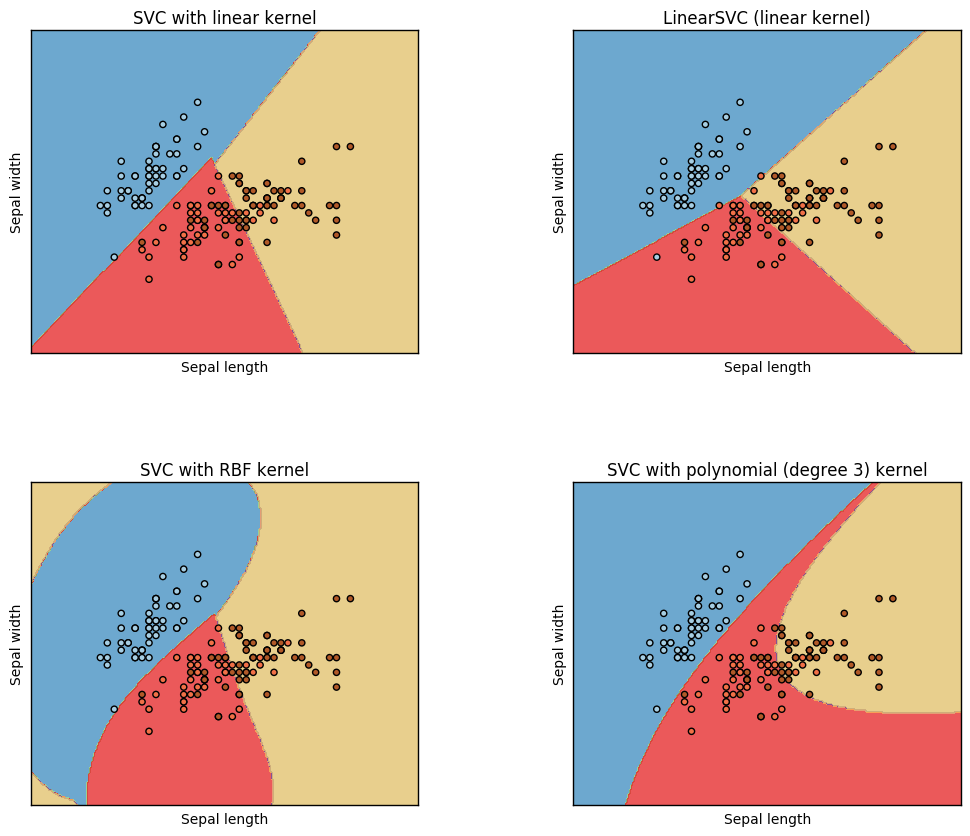

In [81]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 10)

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

SVM刚出来的时候，数据量不大，准确率高，理论完善。但是现在数据量变大，集成学习发展，深度学习发展，svm也越来不受欢迎。一个是非常慢，不适合更新，迭代模型。另一个是准确率，不如boosting, bagging这种集成模型来的高。kaggle和天池更是这样。宁愿用logistic来建模型也不用svm，虽然准确率较低，但是速度非常快。只要特征学得好，logistic也能做到很好地效果。这一点在广告行业可以得到论证。

**Practical tips of svm**


1.        Avoiding data copy: For SVC, SVR, NuSVC and NuSVR, if the data passed to certain methods is not C-ordered contiguous, and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its flags attribute.

2.       For LinearSVC (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision floats and int32 indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input we suggest to use the SGDClassifier class instead. The objective function can be configured to be almost the same as the LinearSVC model.

3.        Kernel cache size: For SVC, SVR, nuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).
> 核函数缓存大小。调大的话速度会快一些。但这个取决于你的内存有多大。比如我有16GB，那就直接分配1000MB

4.        Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.
> C默认是1，这是有理由的。如果你觉得样本里又噪音，那就把C调小一点

5.        Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization.
> SVM 是一定要求对数据做标准化，做归一化的。因为它是计算距离的。

6.        Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.

7.        In SVC, if data for classification are unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.
> 如何觉得数据不平衡，那就试一试class_weight, sample_weight. 或者直接试一试不同的C

8.        The underlying LinearSVC implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.

9.        Using L1 penalization as provided by LinearSVC(loss='l2', penalty='l1', dual=False) yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing C yields a more complex model (more feature are selected). The C value that yields a “null” model (all weights equal to zero) can be calculated using l1_min_c.
> 如果用了L1，得到的就是一个稀疏解。用L2就不是一个稀疏解了。

虽然SVM理论学起来东西很多，对偶，凸优化之类的。但是实际应用需要注意的地方并不多。参数只有C,gamma. 另外注意下不平衡问题，还有一个就是求概率的知识点。